In [1]:
import doublespike as ds

In [2]:
idat = ds.IsoData('Fe')

In [3]:
print(idat)

element: Fe
isonum: [54 56 57 58]
mass: [53.9396148 55.9349421 56.9353987 57.9332805]
standard: [0.05845 0.91754 0.02119 0.00282]
spike: None


In [4]:
idat.set_spike([0.0, 0.0, 0.5, 0.5])

In [5]:
measured = [0.2658, 4.4861, 2.6302, 2.6180]

In [6]:
ds.dsinversion(idat, measured)

{'alpha': -0.190741366877082,
 'beta': 1.8043635576745123,
 'prop': 0.4999563048719154,
 'sample': array([0.05806459, 0.91782714, 0.02126843, 0.00283983]),
 'mixture': array([0.02903483, 0.45895368, 0.2606133 , 0.25139819])}

In [7]:
help(ds.dsinversion)

Help on function dsinversion in module doublespike.inversion:

dsinversion(isodata, measured, spike=None, isoinv=None, standard=None)
    Do the double spike inversion for a given set of measurements
            isodat -- object of class IsoData, e.g. IsoData('Fe')
            measured -- a matrix of beam intensities. Columns correspond to the
                different isotopes e.g. for Fe, first column is 54Fe, second is 56Fe,
                third is 57Fe, fourth is 58Fe. The matrix should have the same number
                of columns as there are isotopes available.
            spike -- a composition vector for the spike. e.g. [0, 0, 0.5, 0.5] is a 50-50
                mix of 57Fe and 58Fe. If None this is read from isodata.
            isoinv -- the four isotopes to use in the inversion, e.g [54, 56, 57, 58]. If
                None this is read from isodata.
            standard -- standard composition or unspiked run data. If
                None this is read from isodata.
   

In [8]:
help(ds.IsoData)

Help on class IsoData in module doublespike.isodata:

class IsoData(builtins.object)
 |  Methods defined here:
 |  
 |  __init__(self, element)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  __str__(self)
 |      Return str(self).
 |  
 |  isoindex(self, ix)
 |      give the data index corresponding to a given isotope number
 |  
 |  isolabel(self)
 |      isotope labels for plotting
 |  
 |  isoname(self)
 |      names of the isotopes
 |  
 |  nisos(self)
 |      number of isotopes in system
 |  
 |  nratios(self)
 |      number of isotope ratios to describe system
 |  
 |  set_custom_errormodel(self, errormodel)
 |      Set the error model used for error estimates and monte carlo runs.
 |      
 |      Parameters:
 |              errormodel: A dictionary giving the complete errormodel.
 |              
 |      See IsoData.errormodel for format of dictionary.
 |  
 |  set_element(self, element)
 |  
 |

In [9]:
idat.set_errormodel()

In [10]:
idat.errormodel

{'measured': {'type': 'fixed-total',
  'intensity': 10,
  'a': array([2.0709756e-10, 2.0709756e-10, 2.0709756e-10, 2.0709756e-10]),
  'b': array([2.00272058e-09, 2.00272058e-09, 2.00272058e-09, 2.00272058e-09]),
  'c': array([0., 0., 0., 0.])},
 'spike': {'type': 'fixed-total',
  'intensity': 10,
  'a': array([0., 0., 0., 0.]),
  'b': array([0., 0., 0., 0.]),
  'c': array([0., 0., 0., 0.])},
 'standard': {'type': 'fixed-total',
  'intensity': 10,
  'a': array([0., 0., 0., 0.]),
  'b': array([0., 0., 0., 0.]),
  'c': array([0., 0., 0., 0.])}}

In [11]:
idat=ds.IsoData('Fe')
idat.set_errormodel()
idat.errormodel

{'measured': {'type': 'fixed-total',
  'intensity': 10,
  'a': array([2.0709756e-10, 2.0709756e-10, 2.0709756e-10, 2.0709756e-10]),
  'b': array([2.00272058e-09, 2.00272058e-09, 2.00272058e-09, 2.00272058e-09]),
  'c': array([0., 0., 0., 0.])},
 'spike': {'type': 'fixed-total',
  'intensity': 10,
  'a': array([0., 0., 0., 0.]),
  'b': array([0., 0., 0., 0.]),
  'c': array([0., 0., 0., 0.])},
 'standard': {'type': 'fixed-total',
  'intensity': 10,
  'a': array([0., 0., 0., 0.]),
  'b': array([0., 0., 0., 0.]),
  'c': array([0., 0., 0., 0.])}}

[[0.26574547 4.48597765 2.63034268 2.6179153 ]
 [0.2657121  4.48586656 2.6303873  2.61787862]
 [0.26573978 4.48588227 2.6303469  2.61801331]
 [0.26573488 4.48597657 2.63045121 2.61781531]
 [0.26568279 4.48590343 2.63031812 2.61790267]
 [0.26573024 4.48594063 2.63017982 2.61794388]
 [0.26576043 4.4858857  2.63027336 2.61786617]
 [0.26574343 4.48598938 2.63034144 2.61794811]
 [0.26577707 4.48605994 2.63026825 2.61792145]
 [0.26575533 4.48591607 2.63017772 2.61801761]]


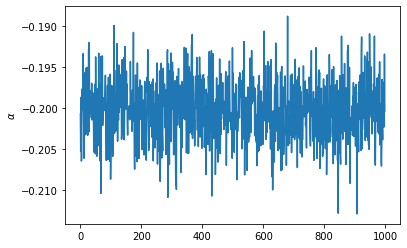

In [12]:
idat = ds.IsoData('Fe')
idat.set_spike([0.0, 0.0, 0.5, 0.5])
idat.set_errormodel()
measuredv = ds.monterun(idat, prop = 0.5, alpha = -0.2, beta = 1.8, n = 1000)
print(measuredv[0:10,:])
    
out = ds.dsinversion(idat, measuredv)
import matplotlib.pyplot as plt
plt.plot(out['alpha'])
plt.ylabel(r'$\alpha$')
plt.show()

In [15]:
isodata = ds.IsoData('Fe')
isodata.set_errormodel()
measured = ds.monterun(isodata,0.5,[0, 0, 0.5, 0.5], n=10)
measured

array([[0.29223126, 4.5876326 , 2.60581203, 2.51401705],
       [0.2922414 , 4.58763526, 2.60587647, 2.51407369],
       [0.29226142, 4.58764064, 2.60588375, 2.51414258],
       [0.2922614 , 4.5877192 , 2.6059649 , 2.51426829],
       [0.29223585, 4.58772006, 2.60594392, 2.51413719],
       [0.29226075, 4.58776235, 2.60591087, 2.51410654],
       [0.29224381, 4.58762587, 2.60603796, 2.5141483 ],
       [0.29222804, 4.58767465, 2.60601161, 2.51396086],
       [0.29223711, 4.58772723, 2.60594092, 2.51406348],
       [0.2922563 , 4.58775071, 2.60604885, 2.51413132]])

In [17]:
ds.dsinversion(isodata,measured,[0, 0, 0.5, 0.5],[54, 56, 57, 58])

{'alpha': array([-8.19529559e-05,  6.49162143e-04,  3.86449300e-03,  4.46819578e-03,
        -4.01365478e-04,  1.69828847e-03, -1.08055231e-03, -6.48891316e-03,
        -1.95266560e-03, -1.25114712e-03]),
 'beta': array([ 0.00127892,  0.0010706 ,  0.00243253,  0.00350951,  0.00105174,
         0.00105971, -0.00094264, -0.00457243, -0.00057539, -0.00154055]),
 'prop': array([0.49998414, 0.49999123, 0.49998464, 0.49998318, 0.49999348,
        0.49998727, 0.5000176 , 0.50003018, 0.50000064, 0.5000144 ]),
 'sample': array([[0.05844983, 0.91754012, 0.02119003, 0.00282001],
        [0.05845132, 0.91753902, 0.02118973, 0.00281993],
        [0.05845783, 0.91753415, 0.02118841, 0.0028196 ],
        [0.05845906, 0.91753324, 0.02118817, 0.00281954],
        [0.05844919, 0.91754061, 0.02119016, 0.00282004],
        [0.05845344, 0.91753743, 0.0211893 , 0.00281982],
        [0.05844781, 0.91754163, 0.02119044, 0.00282011],
        [0.05843685, 0.91754981, 0.02119266, 0.00282067],
        [0.05844604